# Linear Convection

In [1]:
import numpy
from matplotlib import pyplot

%matplotlib inline

In [83]:
"""Starting with creation of grid"""

#Set parameters

nx= 41
L = 2
dx = L/(nx-1)

nt = 25
nt1 = 1
dt = 0.02

c=1.0 #c is convection speed

#creating an array for x
"""can also be written as nx instead of num=nx"""
x = numpy.linspace(0.0,L,num=nx)

In [44]:
#displaying the array
x

array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
       0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  , 1.05,
       1.1 , 1.15, 1.2 , 1.25, 1.3 , 1.35, 1.4 , 1.45, 1.5 , 1.55, 1.6 ,
       1.65, 1.7 , 1.75, 1.8 , 1.85, 1.9 , 1.95, 2.  ])

In [45]:
u0 = numpy.ones(nx)

Numpy.where

In [46]:
"""numpy.where to set values in range of indices in array"""
mask = numpy.where((x>=0.5)&(x<=1.0))
mask

(array([10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]),)

In [47]:
u0[mask] = 2.0

In [48]:
for i in range(nx):
    print(x[i] , u0[i])

0.0 1.0
0.05 1.0
0.1 1.0
0.15000000000000002 1.0
0.2 1.0
0.25 1.0
0.30000000000000004 1.0
0.35000000000000003 1.0
0.4 1.0
0.45 1.0
0.5 2.0
0.55 2.0
0.6000000000000001 2.0
0.65 2.0
0.7000000000000001 2.0
0.75 2.0
0.8 2.0
0.8500000000000001 2.0
0.9 2.0
0.9500000000000001 2.0
1.0 2.0
1.05 1.0
1.1 1.0
1.1500000000000001 1.0
1.2000000000000002 1.0
1.25 1.0
1.3 1.0
1.35 1.0
1.4000000000000001 1.0
1.4500000000000002 1.0
1.5 1.0
1.55 1.0
1.6 1.0
1.6500000000000001 1.0
1.7000000000000002 1.0
1.75 1.0
1.8 1.0
1.85 1.0
1.9000000000000001 1.0
1.9500000000000002 1.0
2.0 1.0


In [77]:
def plot_figure(x,u0,u):
    pyplot.figure(figsize = (4.0,4.0))
    pyplot.xlabel('x')
    pyplot.ylabel('u')
    pyplot.grid()
    pyplot.plot(x, u0, label='Initial')
    pyplot.plot(x, u , label='Current')
    pyplot.xlim(0.0,2.0)
    pyplot.ylim(0.0,2.5)

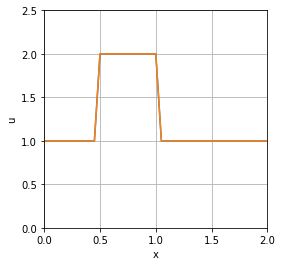

In [78]:
plot_figure(x,u0,u0)

# Forward time backword Space (FTBS)

In [79]:
#creating an array of u0 using .copy()
u = u0.copy()

for n in range(nt):
    un = u.copy()
    for i in range(1,nx):
        u[i] = un[i] - c*dt/dx*(un[i]-un[i-1])      

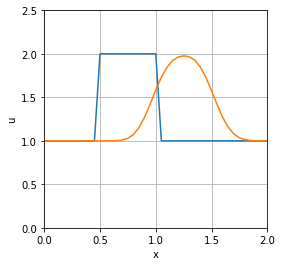

In [80]:
plot_figure(x,u0,u)

In [58]:
#for 1 time step
u1 = u0.copy()

for n in range(nt1):
    un = u1.copy()
    for i in range(1,nx):
        u1[i] = un[i] - c*dt/dx*(un[i]-un[i-1])      

Decreasing the value of nt makes the curve more similar to the initial curve.

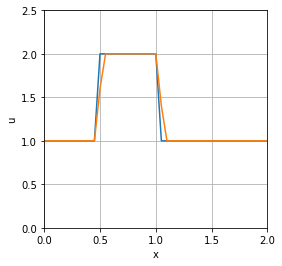

In [61]:
plot_figure(x,u0,u1)

In [64]:
#for timestep 2
nt2 = 2

u2 = u0.copy()

for n in range(nt2):
    un = u2.copy()
    for i in range(1,nx):
        u2[i] = un[i] - c*dt/dx*(un[i]-un[i-1]) 


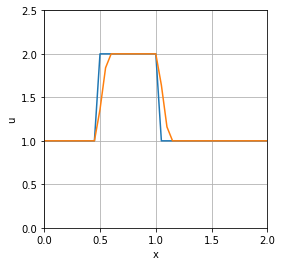

In [65]:
plot_figure(x,u0,u2)

## Non linear convection

In [109]:
nx_nonlinear = 41
L_nonlinear  = 2.0
dx_nonlinear = L/(nx_nonlinear-1)

nt_nonlinear = 25
nt1 = 1.0
dt_nonlinear = 0.02

c_nonlinear=1.0 #c is convection speed

#creating an array for x
"""can also be written as nx instead of num=nx"""
xnl = numpy.linspace(0.0,L_nonlinear,num=nx_nonlinear)

In [110]:
u0_nonlinear = numpy.zeros(nx_nonlinear)

mask_nt = numpy.where((xnl>=0.5)&(xnl<=1.0))

u0_nonlinear[mask_nt] = 2

In [119]:
unl = u0_nonlinear.copy()

for n in range(nt_nonlinear):
    un = unl.copy()
    for i in range(1,nx_nonlinear):
        unl[i] = un[i] - un[i]*(dt_nonlinear/dx_nonlinear*(un[i]-un[i-1]))  

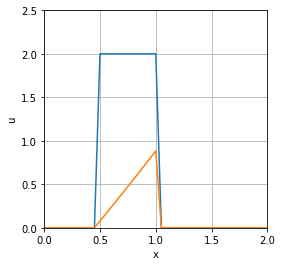

In [120]:
plot_figure(xnl,u0_nonlinear,unl)

In [113]:
a= numpy.linspace(0.0,1.0, num=6)

In [114]:
a

array([0. , 0.2, 0.4, 0.6, 0.8, 1. ])

In [115]:
a[1:-1]

array([0.2, 0.4, 0.6, 0.8])

In [116]:
a[:]

array([0. , 0.2, 0.4, 0.6, 0.8, 1. ])

In [121]:
for i in range(1, len(a)):
    a[i] = 1.0
a

array([0., 1., 1., 1., 1., 1.])

In [122]:
a[1:] = 1.0

In [123]:
a

array([0., 1., 1., 1., 1., 1.])

In [128]:
u = u0.copy()
for n in range(nt):
    un = u.copy()
#    for i in range(1,nx):
#        u[i] = un[i] - un[i] * dt/dx *(un[i]-un[i-1])
    u[1:] = un[1:] - un[1:] * dt/dx *(un[1:]-un[:-1])

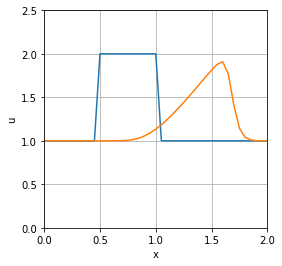

In [129]:
plot_figure(x, u0, u)

a= numpy.linspace(0.0, 1.0, num=6)
b= numpy.linspace(1.0, 2.0, num=6)

"""
To update all elements of a except the first one with all the elements of b except the last one 
"""

# we use [  a[1:] = b[:-1]  ]

